In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import glob
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import applications
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import backend as K
import gc
from tensorflow.keras.models import Model
import pickle

In [5]:
train_dir="E:/sign_data/Dataset/train"
test_dir="E:/sign_data/Dataset/test"


In [6]:
SIZE = 224


In [7]:
train_data_names = []
test_data_names = []

train_data = []
train_labels = []

for per in os.listdir('E:/sign_data/Dataset/train'):
    for data in glob.glob('E:/sign_data/Dataset/train/'+per+'/*.*'):
        
        train_data_names.append(data)
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        train_data.append([img])
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

#Test Data

test_data = []
test_labels = []

for per in os.listdir('E:/sign_data/Dataset/test'):
    for data in glob.glob('E:/sign_data/Dataset/test/'+per+'/*.*'):
        test_data_names.append(data)
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        test_data.append([img])
        if per[-1]=='g':
            test_labels.append(np.array(1))
        else:
            test_labels.append(np.array(0))

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [8]:
with open('./train2_data_names.pkl', 'wb') as fp:
    pickle.dump(train_data_names, fp)

with open('./test2_data_names.pkl', 'wb') as fp:
    pickle.dump(test_data_names, fp)

In [9]:
# Categorical labels
#print(train_labels)
train_labels = to_categorical(train_labels)
#print(train_data.shape)
# Reshaping
train_data = train_data.reshape(-1, SIZE,SIZE, 3)
test_data = test_data.reshape(-1, SIZE,SIZE, 3)


In [10]:
input_ = (224,224,3)
EPOCHS = 40
BS = 64
output_ = 2

Using TensorFlow backend.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16_input (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 21,137,986
Trainable params: 21,137,986
Non-trainable params: 0
_________________________________________________________________
Train on 1154 samples, validate on 495 samples
Epoch 1/40
1154/1154 [==============================] - 1448s 1s/sam

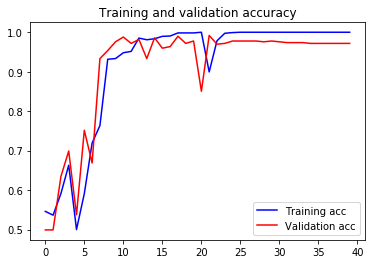

<Figure size 432x288 with 0 Axes>

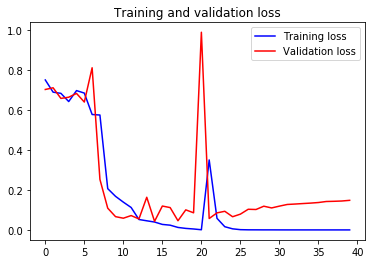

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import random_rotation

base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = ImageDataGenerator(rotation_range=10)
#data_augmentation.random_transform(img_array)
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

#earlyStopping = EarlyStopping(monitor='val_loss',
#                             min_delta=0,
#                             patience=3,
#                            verbose=1)

#early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./train2', intermediate_output_train)
np.save('./test2', intermediate_output_test)


In [11]:
from tensorflow.keras.models import load_model

#model.save('forge_real_signature_model2.h5')

test_output=model.predict(test_data)

x=np.argmax(test_output,axis=1)

In [12]:
#test_output


#pred = model.predict(test_output)
#pred
#img = cv2.imread('E:/sign_data/Dataset/test/049_forg/01_0114049')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = cv2.resize(img, (SIZE,SIZE))
#s=np.array(img)/255.0
#s=s.reshape(-1, SIZE,SIZE, 3)




import cv2
import numpy as np

# 이미지 읽기
img = cv2.imread('E:/sign_data/Dataset/test/049_forg/01_0114049.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 이미지 크기 조정
SIZE = 224  # 예시로 224로 가정
img = cv2.resize(img, (SIZE, SIZE))

# 이미지를 모델의 입력 형태에 맞게 변환
input_data = np.array(img) / 255.0  # 0~1 사이의 값으로 정규화
input_data = input_data.reshape(-1, SIZE, SIZE, 3)  # 4차원 형태로 변환



# 모델 예측
prediction = model.predict(input_data)
predicted_label = np.argmax(prediction[0])
print(predicted_label)

# 예측 수행
pred = model.predict(input_data)
print(pred)

1
[[1.3265211e-20 1.0000000e+00]]


In [13]:
x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,

In [4]:
from tensorflow.keras.models import load_model
model = load_model('forge_real_signature_model2.h5')
#test_output=model.predict(s)
#x=np.argmax(test_output,axis=1)
#x

In [20]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model2.h5")
print("Saved model to disk")

Saved model to disk


In [6]:
from tensorflow.keras.models import model_from_json

In [7]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model2.h5")
print("Loaded model from disk")

Loaded model from disk


In [3]:


################ 학습 모델 성능 확인#####################


import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import applications
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model, load_model

# Load existing model

SIZE = 224

model = load_model('forge_real_signature_model2.h5')


# 이미지 파일 경로

image_path = 'E:/sign_data/Dataset/train/017_forg/01_0124017.png'

# 이미지 로드 및 전처리
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (SIZE, SIZE))
img = img / 255.0
img = np.expand_dims(img, axis=0)

# 모델 예측
prediction = model.predict(img)
predicted_label = np.argmax(prediction[0])

# 판별 결과 출력
if predicted_label == 0:
    print("입력 이미지는 진위된 서명입니다.")
else:
    print("입력 이미지는 가짜 서명입니다.")

입력 이미지는 가짜 서명입니다.


In [35]:
############## 새로운 user의 handwriting 서명샘플에 대한 학습 모델 업데이트 ###########





import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model, load_model

# Load the model architecture from JSON file
with open('model.json', 'r') as json_file:
    model_json = json_file.read()
    model = model_from_json(model_json)

# Load the model weights
model.load_weights('model2.h5')

# Load and preprocess new data
SIZE = 224

new_data_names = []
new_data = []
new_labels = []

for per in os.listdir('E:/sign_data/Dataset/train2'):
    for data in glob.glob('E:/sign_data/Dataset/train2/'+per+'/*.*'):
        new_data_names.append(data)
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE, SIZE))
        new_data.append(img)
        if per[-1] == 'g':
            new_labels.append(1)
        else:
            new_labels.append(0)

# Code for loading and preprocessing new data
new_data = np.array(new_data) / 255.0
new_labels = np.array(new_labels)

# Convert labels to categorical
new_labels = to_categorical(new_labels)

# Reshape data
new_data = new_data.reshape(-1, SIZE, SIZE, 3)

# Specify the layers to be updated during transfer learning
transfer_layers = 5  # Number of layers to freeze

# Remove the last layer and add a new output layer
x = model.layers[-2].output
predictions = Dense(64, activation='relu')(x)
predictions = Dense(2, activation='softmax')(predictions)
transfer_model = Model(inputs=model.input, outputs=predictions)

# Compile the model
transfer_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

# Define callbacks

#early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max')
#model_checkpoint = ModelCheckpoint('updated_model2.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model with new data
EPOCHS = 40
BS = 64

progress = transfer_model.fit(new_data, new_labels, batch_size=BS, epochs=EPOCHS, validation_split=0.3)


# Save the updated model
transfer_model.save('updated_model2.h5')



Train on 7 samples, validate on 3 samples
Epoch 1/40
7/7 [==============================] - 19s 3s/sample - loss: 26.4019 - accuracy: 0.7143 - val_loss: 27.0426 - val_accuracy: 0.0000e+00
Epoch 2/40
7/7 [==============================] - 15s 2s/sample - loss: 6.6976 - accuracy: 0.7143 - val_loss: 5.8960 - val_accuracy: 0.0000e+00
Epoch 3/40
7/7 [==============================] - 15s 2s/sample - loss: 1.2932 - accuracy: 0.7143 - val_loss: 1.6993 - val_accuracy: 0.0000e+00
Epoch 4/40
7/7 [==============================] - 15s 2s/sample - loss: 0.5147 - accuracy: 0.7143 - val_loss: 1.4720 - val_accuracy: 0.0000e+00
Epoch 5/40
7/7 [==============================] - 15s 2s/sample - loss: 0.5798 - accuracy: 0.7143 - val_loss: 1.4633 - val_accuracy: 0.0000e+00
Epoch 6/40
7/7 [==============================] - 15s 2s/sample - loss: 0.5883 - accuracy: 0.7143 - val_loss: 1.2595 - val_accuracy: 0.0000e+00
Epoch 7/40
7/7 [==============================] - 14s 2s/sample - loss: 0.5843 - accuracy: 0

In [13]:
############## 새로운 user의 handwriting 서명샘플에 대한 학습 모델 업데이트 ###########


############## final_test


import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model, load_model

model = load_model('forge_real_signature_model2.h5')
# Load and preprocess new data
SIZE = 224

new_data_names = []
new_data = []
new_labels = []

for per in os.listdir('E:/sign_data/Dataset/train2'):
    for data in glob.glob('E:/sign_data/Dataset/train2/'+per+'/*.*'):
        new_data_names.append(data)
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE, SIZE))
        new_data.append(img)
        if per[-1] == 'g':
            new_labels.append(1)
        else:
            new_labels.append(0)

# Code for loading and preprocessing new data
new_data = np.array(new_data) / 255.0
new_labels = np.array(new_labels)

# Convert labels to categorical
new_labels = to_categorical(new_labels)

# Reshape data
new_data = new_data.reshape(-1, SIZE, SIZE, 3)

# Specify the layers to be updated during transfer learning
transfer_layers = 5  # Number of layers to freeze

# Remove the last layer and add a new output layer
x = model.layers[-2].output
predictions = Dense(64, activation='relu')(x)
predictions = Dense(2, activation='softmax')(predictions)
transfer_model = Model(inputs=model.input, outputs=predictions)

# Compile the model
transfer_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

# Define callbacks

#early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max')
#model_checkpoint = ModelCheckpoint('updated_model2.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model with new data
EPOCHS = 60
BS = 64

progress = transfer_model.fit(new_data, new_labels, batch_size=BS, epochs=EPOCHS, validation_split=0.3)


# Save the updated model
transfer_model.save('updated_model4.h5')



Train on 7 samples, validate on 3 samples
Epoch 1/60
7/7 [==============================] - 11s 2s/sample - loss: 2.0823 - accuracy: 0.8571 - val_loss: 1.2318e-06 - val_accuracy: 1.0000
Epoch 2/60
7/7 [==============================] - 9s 1s/sample - loss: 1.9962 - accuracy: 0.7143 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 3/60
7/7 [==============================] - 9s 1s/sample - loss: 0.2480 - accuracy: 0.8571 - val_loss: 0.1215 - val_accuracy: 1.0000
Epoch 4/60
7/7 [==============================] - 9s 1s/sample - loss: 0.0460 - accuracy: 1.0000 - val_loss: 0.5287 - val_accuracy: 0.6667
Epoch 5/60
7/7 [==============================] - 9s 1s/sample - loss: 0.1211 - accuracy: 1.0000 - val_loss: 0.7869 - val_accuracy: 0.6667
Epoch 6/60
7/7 [==============================] - 9s 1s/sample - loss: 0.1388 - accuracy: 1.0000 - val_loss: 0.7760 - val_accuracy: 0.6667
Epoch 7/60
7/7 [==============================] - 9s 1s/sample - loss: 0.0848 - accuracy: 1.0000 - val_loss: 0.6664 - v

Epoch 58/60
7/7 [==============================] - 8s 1s/sample - loss: 5.1090e-08 - accuracy: 1.0000 - val_loss: 2.3055e-04 - val_accuracy: 1.0000
Epoch 59/60
7/7 [==============================] - 8s 1s/sample - loss: 5.1090e-08 - accuracy: 1.0000 - val_loss: 2.2662e-04 - val_accuracy: 1.0000
Epoch 60/60
7/7 [==============================] - 9s 1s/sample - loss: 5.1090e-08 - accuracy: 1.0000 - val_loss: 2.2293e-04 - val_accuracy: 1.0000


In [14]:


###################### 추가 데이터 결과 확인 ######################


import numpy as np
import cv2
from tensorflow.keras.models import Model, load_model

# Load existing model
model = load_model('updated_model4.h5')

# Load and preprocess new data
SIZE = 224

new_data_names = []
new_data = []

for per in os.listdir('E:/sign_data/Dataset/train2'):
    for data in glob.glob('E:/sign_data/Dataset/train2/'+per+'/*.*'):
        new_data_names.append(data)
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE, SIZE))
        new_data.append(img)

# Code for loading and preprocessing new data
new_data = np.array(new_data) / 255.0

# Reshape data
new_data = new_data.reshape(-1, SIZE, SIZE, 3)

# Predict the authenticity of the new data
predictions = model.predict(new_data)
authenticity = np.argmax(predictions, axis=1)

# Display the results
for i, data_name in enumerate(new_data_names):
    print(f"Data: {data_name}, Authenticity: {'Real' if authenticity[i] == 0 else 'Forgery'}")


Data: E:/sign_data/Dataset/train2/001\KakaoTalk_20230603_202541998.jpg, Authenticity: Real
Data: E:/sign_data/Dataset/train2/001\KakaoTalk_20230603_202541998_01.jpg, Authenticity: Real
Data: E:/sign_data/Dataset/train2/001\KakaoTalk_20230603_202541998_02.jpg, Authenticity: Real
Data: E:/sign_data/Dataset/train2/001\KakaoTalk_20230603_202541998_03.jpg, Authenticity: Real
Data: E:/sign_data/Dataset/train2/001\KakaoTalk_20230603_202541998_04.jpg, Authenticity: Real
Data: E:/sign_data/Dataset/train2/001_forg\10.jpg, Authenticity: Forgery
Data: E:/sign_data/Dataset/train2/001_forg\6.jpg, Authenticity: Forgery
Data: E:/sign_data/Dataset/train2/001_forg\7.jpg, Authenticity: Forgery
Data: E:/sign_data/Dataset/train2/001_forg\8.jpg, Authenticity: Forgery
Data: E:/sign_data/Dataset/train2/001_forg\9.jpg, Authenticity: Forgery


In [30]:



################## new input verification #################


import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the updated model
model = load_model('updated_model2.h5')

# Load and preprocess the signature image
SIZE = 224

# Function to preprocess the image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (SIZE, SIZE))
    img = np.array(img) / 255.0
    img = img.reshape(-1, SIZE, SIZE, 3)
    return img

# Function to predict the authenticity of a signature
def predict_signature(image_path):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    authenticity = "Real" if predictions[0][0] > predictions[0][1] and predictions[0][0] > 0.85  else "Forgery"
    confidence = predictions[0][0] * 100
    #print(predictions[0][0])
    #print(predictions[0][1])
    
    #print(predictions)
    return authenticity,confidence

# Path to the signature image

#signature_image_path = 'E:/sign_data/Dataset/train1/001/5.png'

signature_image_path = 'E:/sign_data/Dataset/train2/forg_test1.jpg'

#signature_image_path = 'E:/sign_data/Dataset/train2/forg_test_1.jpg'

#signature_image_path = 'E:/sign_data/Dataset/KakaoTalk_20230528_151816148.png'

#signature_image_path = 'E:/sign_data/KakaoTalk_20230528_152937618.jpg'

# Predict the authenticity of the signature
authenticity = predict_signature(signature_image_path)



# Print the result
print("Signature authenticity: ", authenticity)

Signature authenticity:  ('Forgery', 0.0008924822395783849)


In [43]:
####### 모델 경량화 ###############

from tensorflow.keras.models import load_model

# Load the model
model = load_model('updated_model2.h5')

# Save model architecture as JSON
model_json = model.to_json()
with open("updated_model2.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights as HDF5
model.save_weights("updated_model2_weights.h5")


In [45]:
######## tfLite model #######################

import tensorflow as tf
import pickle

# Load the updated model
model = tf.keras.models.load_model('updated_model2.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('updated_model2.tflite', 'wb') as f:
    f.write(tflite_model)

# Save the label mapping
label_mapping = {
    0: 'Real',
    1: 'Forgery'
}

with open('label_mapping.pkl', 'wb') as f:
    pickle.dump(label_mapping, f)

print("Model converted to TensorFlow Lite format and saved as updated_model2.tflite")


Model converted to TensorFlow Lite format and saved as updated_model2.tflite


In [52]:
!pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 1.7 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
c:\users\82102\anaconda3\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
!pip install --pre -U jax jaxlib

  Using cached jax-0.3.25.tar.gz (1.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 36, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\82102\AppData\Local\Temp\pip-install-idash5tb\jax_c10acd824a894c71bda70602b18997f7\setup.py", line 38, in <module>
      _long_description = f.read()
  UnicodeDecodeError: 'cp949' codec can't decode byte 0xe2 in position 1304: illegal multibyte sequence
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
###################  tfjs model ##########################

import tensorflowjs as tfjs

# Load the TensorFlow model
model = tf.keras.models.load_model('updated_model2.h5')

# Convert the model to TensorFlow.js format
tfjs.converters.save_keras_model(model, 'updated_model2.tfjs')

print("Model converted to TensorFlow.js format and saved as your_tfjs_model")


ModuleNotFoundError: No module named 'tensorflowjs'

Train on 7 samples, validate on 3 samples
Epoch 1/30
7/7 [==============================] - 22s 3s/sample - loss: 20.6905 - accuracy: 0.2857 - val_loss: 4.1091 - val_accuracy: 0.6667
Epoch 2/30
7/7 [==============================] - 17s 2s/sample - loss: 3.1842 - accuracy: 0.7143 - val_loss: 3.8134 - val_accuracy: 0.6667
Epoch 3/30
7/7 [==============================] - 17s 2s/sample - loss: 2.1775 - accuracy: 0.7143 - val_loss: 2.5786 - val_accuracy: 0.3333
Epoch 4/30
7/7 [==============================] - 16s 2s/sample - loss: 0.8244 - accuracy: 0.7143 - val_loss: 1.7166 - val_accuracy: 0.3333
Epoch 5/30
7/7 [==============================] - 15s 2s/sample - loss: 0.2641 - accuracy: 0.8571 - val_loss: 1.2063 - val_accuracy: 0.0000e+00
Epoch 6/30
7/7 [==============================] - 15s 2s/sample - loss: 0.5110 - accuracy: 0.7143 - val_loss: 1.9268 - val_accuracy: 0.0000e+00
Epoch 7/30
7/7 [==============================] - 15s 2s/sample - loss: 0.5417 - accuracy: 0.7143 - val_loss:

Data: E:/sign_data/Dataset/train2/001\1.jpg, Authenticity: Real
Data: E:/sign_data/Dataset/train2/001\2.jpg, Authenticity: Real
Data: E:/sign_data/Dataset/train2/001\3.jpg, Authenticity: Real
Data: E:/sign_data/Dataset/train2/001\4.jpg, Authenticity: Real
Data: E:/sign_data/Dataset/train2/001\5.jpg, Authenticity: Real
Data: E:/sign_data/Dataset/train2/001_forg\10.jpg, Authenticity: Forgery
Data: E:/sign_data/Dataset/train2/001_forg\6.jpg, Authenticity: Forgery
Data: E:/sign_data/Dataset/train2/001_forg\7.jpg, Authenticity: Forgery
Data: E:/sign_data/Dataset/train2/001_forg\8.jpg, Authenticity: Forgery
Data: E:/sign_data/Dataset/train2/001_forg\9.jpg, Authenticity: Forgery


0.9990451
0.00095491094
[[9.9904507e-01 9.5491094e-04]]
Signature authenticity: Real


In [151]:


###################### 추가 데이터 결과 확인 ######################


import numpy as np
import cv2
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Model, load_model

# Load the model architecture from JSON file
with open('updated_model2.json', 'r') as json_file:
    model_json = json_file.read()
    model = model_from_json(model_json)

# Load the model weights
model.load_weights('updated_model2_weights.h5')

# Load and preprocess new data
SIZE = 224

new_data_names = []
new_data = []

for per in os.listdir('E:/sign_data/Dataset/train1'):
    for data in glob.glob('E:/sign_data/Dataset/train1/'+per+'/*.*'):
        new_data_names.append(data)
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE, SIZE))
        new_data.append(img)

# Code for loading and preprocessing new data
new_data = np.array(new_data) / 255.0

# Reshape data
new_data = new_data.reshape(-1, SIZE, SIZE, 3)

# Predict the authenticity of the new data
predictions = model.predict(new_data)
authenticity = np.argmax(predictions, axis=1)

# Display the results
for i, data_name in enumerate(new_data_names):
    print(f"Data: {data_name}, Authenticity: {'Real' if authenticity[i] == 0 else 'Forgery'}")


Data: E:/sign_data/Dataset/train1/001\10.png, Authenticity: Real
Data: E:/sign_data/Dataset/train1/001\6.png, Authenticity: Real
Data: E:/sign_data/Dataset/train1/001\7.png, Authenticity: Real
Data: E:/sign_data/Dataset/train1/001\KakaoTalk_20230524_170431079_10.png, Authenticity: Real
Data: E:/sign_data/Dataset/train1/001\KakaoTalk_20230524_170431079_11.png, Authenticity: Real
Data: E:/sign_data/Dataset/train1/001_forg\01_1.png, Authenticity: Forgery
Data: E:/sign_data/Dataset/train1/001_forg\01_2.png, Authenticity: Forgery
Data: E:/sign_data/Dataset/train1/001_forg\01_3.png, Authenticity: Forgery
Data: E:/sign_data/Dataset/train1/001_forg\01_4.png, Authenticity: Forgery
Data: E:/sign_data/Dataset/train1/001_forg\01_5.png, Authenticity: Forgery


In [154]:



################## new input verification #################


import numpy as np
import cv2
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Model, load_model

# Load the model architecture from JSON file
with open('updated_model2.json', 'r') as json_file:
    model_json = json_file.read()
    model = model_from_json(model_json)

# Load the model weights
model.load_weights('updated_model2_weights.h5')


# Load and preprocess the signature image
SIZE = 224

# Function to preprocess the image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (SIZE, SIZE))
    img = np.array(img) / 255.0
    img = img.reshape(-1, SIZE, SIZE, 3)
    return img

# Function to predict the authenticity of a signature
def predict_signature(image_path):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    authenticity = "Real" if predictions[0][0] > predictions[0][1] and predictions[0][0] > 0.85  else "Forgery"
    
    print(predictions[0][0])
    print(predictions[0][1])
    
    print(predictions)
    
    return authenticity

# Path to the signature image

#signature_image_path = 'E:/sign_data/Dataset/train1/001/5.png'

signature_image_path = 'E:/sign_data/Dataset/forg.png'

#signature_image_path = 'E:/sign_data/Dataset/KakaoTalk_20230528_151816148.png'

#signature_image_path = 'E:/sign_data/KakaoTalk_20230528_152937618.jpg'

# Predict the authenticity of the signature
authenticity = predict_signature(signature_image_path)

# Print the result
print("Signature authenticity:", authenticity)


# Save model weights as HDF5
model.save_weights("updated_model2_weights.h5")



0.52177495
0.47822502
[[0.52177495 0.47822502]]
Signature authenticity: Forgery


In [107]:
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model, load_model

# Load existing model
model = load_model('forge_real_signature_model2.h5')

# Load and preprocess new data
SIZE = 224

new_data_names = []
new_data = []
new_labels = []

for per in os.listdir('E:/sign_data/Dataset/train1'):
    for data in glob.glob('E:/sign_data/Dataset/train1/'+per+'/*.*'):
        new_data_names.append(data)
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE, SIZE))
        new_data.append(img)
        if per[-1] == 'g':
            new_labels.append(1)
        else:
            new_labels.append(0)

# Code for loading and preprocessing new data
new_data = np.array(new_data) / 255.0
new_labels = np.array(new_labels)

# Convert labels to categorical
new_labels = to_categorical(new_labels)

# Reshape data
new_data = new_data.reshape(-1, SIZE, SIZE, 3)

# Specify the layers to be updated during transfer learning
transfer_layers = 5  # Number of layers to freeze

# Remove the last layer and add a new output layer
x = model.layers[-2].output
predictions = Dense(64, activation='relu')(x)
predictions = Dense(2, activation='softmax')(predictions)
transfer_model = Model(inputs=model.input, outputs=predictions)

# Compile the model
transfer_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

# Train the model with new data
EPOCHS = 20
BS = 64

#early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

progress = transfer_model.fit(new_data, new_labels, batch_size=BS, epochs=EPOCHS, validation_split=0.3)

# Save the updated model
transfer_model.save('updated_model2.h5')


Train on 3 samples, validate on 2 samples
Epoch 1/20
3/3 [==============================] - 7s 2s/sample - loss: 43.4659 - accuracy: 0.0000e+00 - val_loss: 11.0277 - val_accuracy: 0.0000e+00
Epoch 2/20
3/3 [==============================] - 5s 2s/sample - loss: 12.8024 - accuracy: 0.0000e+00 - val_loss: 3.6866 - val_accuracy: 0.0000e+00
Epoch 3/20
3/3 [==============================] - 5s 2s/sample - loss: 2.1014 - accuracy: 0.0000e+00 - val_loss: 0.6392 - val_accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 5s 2s/sample - loss: 0.0751 - accuracy: 1.0000 - val_loss: 0.1478 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 5s 2s/sample - loss: 0.0242 - accuracy: 1.0000 - val_loss: 0.1010 - val_accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 5s 2s/sample - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.0935 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 5s 2s/sample - loss: 0.0231 - accuracy: 1.0000 - va

In [121]:
import numpy as np
import cv2
from tensorflow.keras.models import Model, load_model

# Load existing model
model = load_model('updated_model2.h5')

# Load and preprocess new data
SIZE = 224

new_data_names = []
new_data = []

for per in os.listdir('E:/sign_data/Dataset/train1'):
    for data in glob.glob('E:/sign_data/Dataset/train1/'+per+'/*.*'):
        new_data_names.append(data)
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE, SIZE))
        new_data.append(img)

# Code for loading and preprocessing new data
new_data = np.array(new_data) / 255.0

# Reshape data
new_data = new_data.reshape(-1, SIZE, SIZE, 3)

# Predict the authenticity of the new data
predictions = model.predict(new_data)
authenticity = np.argmax(predictions, axis=1)

# Display the results
for i, data_name in enumerate(new_data_names):
    print(f"Data: {data_name}, Authenticity: {'Real' if authenticity[i] != 0 else 'Forgery'}")


Data: E:/sign_data/Dataset/train1/001_forg\10.png, Authenticity: Real
Data: E:/sign_data/Dataset/train1/001_forg\6.png, Authenticity: Real
Data: E:/sign_data/Dataset/train1/001_forg\7.png, Authenticity: Real
Data: E:/sign_data/Dataset/train1/001_forg\KakaoTalk_20230524_170431079_10.png, Authenticity: Real
Data: E:/sign_data/Dataset/train1/001_forg\KakaoTalk_20230524_170431079_11.png, Authenticity: Real


In [132]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the updated model
model = load_model('updated_model2.h5')

# Load and preprocess the signature image
SIZE = 224

# Function to preprocess the image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (SIZE, SIZE))
    img = np.array(img) / 255.0
    img = img.reshape(-1, SIZE, SIZE, 3)
    return img

# Function to predict the authenticity of a signature
def predict_signature(image_path):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    authenticity = "Real" if predictions[0][1] > predictions[0][0] and predictions[0][1] > 0.85  else "Forgery"
    
    print(predictions[0][0])
    print(predictions[0][1])
    
    print(predictions)
    
    return authenticity

# Path to the signature image

signature_image_path = 'E:/sign_data/Dataset/KakaoTalk_20230528_151816148.png'

#signature_image_path = 'E:/sign_data/Dataset/001_forg/01_1.png'

#signature_image_path = 'E:/sign_data/Dataset/KakaoTalk_20230528_151816148.png'

#signature_image_path = 'E:/sign_data/KakaoTalk_20230528_152937618.jpg'

# Predict the authenticity of the signature
authenticity = predict_signature(signature_image_path)

# Print the result
print("Signature authenticity:", authenticity)


0.00018663585
0.9998134
[[1.8663585e-04 9.9981338e-01]]
Signature authenticity: Real


In [126]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the updated model
model = load_model('updated_model2.h5')

# Load and preprocess the signature image
SIZE = 224

# Function to preprocess the image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (SIZE, SIZE))
    img = np.array(img) / 255.0
    img = img.reshape(-1, SIZE, SIZE, 3)
    return img

# Function to predict the authenticity of a signature
def predict_signature(image_path):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    authenticity = "Real" if predictions[0][0] >  0.85  else "Forgery"
    
    print(predictions[0][0])
   
    
    print(predictions)
    
    return authenticity

# Path to the signature image

#signature_image_path = 'E:/sign_data/Dataset/train1/001/5.png'

#signature_image_path = 'E:/sign_data/Dataset/001_forg/01_2.png'

#signature_image_path = 'E:/sign_data/Dataset/KakaoTalk_20230528_151816148.png'

signature_image_path = 'E:/sign_data/Dataset/1.png'

# Predict the authenticity of the signature
authenticity = predict_signature(signature_image_path)

# Print the result
print("Signature authenticity:", authenticity)


0.00036629924
[[3.6629924e-04 9.9963367e-01]]
Signature authenticity: Forgery


The image is predicted as genuine.
